In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/x_train.csv'
x_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/x_test.csv'
x_test = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/y_train.csv'
y_train = pd.read_csv(url)

url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/y_test.csv'
y_test = pd.read_csv(url)


In [3]:
#order of top performing features from pre-processing
top_list = ['Store', 'MDSum', 'MDAverage', 'MDMax', 'MarkDown1', 'MDMin', 'MarkDown5', 'MarkDown4', 'CPI', 'Unemployment',
        'Dept','MarkDown2', 'MarkDown3', 'Temperature', 'Date', 'IsHoliday', 'Fuel_Price']

In [38]:
x_train

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,MDAverage,MDSum,MDMin,MDMax
0,1.392183,1.270486,-1.288570,-0.275106,-0.036322,-1.158147,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.989963,-1.355282,-0.271794,-1.358972,-0.427943,-0.084662
1,-1.188910,-0.926810,-1.361242,-0.275106,-0.731251,-1.275919,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.466451,0.538139,-0.271794,-1.358972,-0.427943,-0.084662
2,-1.188910,0.352213,1.400316,-0.275106,0.244469,0.455762,-0.252011,-0.037627,-0.084038,0.046557,0.081929,0.683805,-0.047383,-0.049038,-0.245190,-0.252011,0.081929
3,0.140744,-1.221970,-0.125808,-0.275106,-0.086734,1.853757,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.934874,0.135089,-0.271794,-1.358972,-0.427943,-0.084662
4,0.062529,-1.156379,-1.724605,-0.275106,-2.430631,-1.249747,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-1.013147,-1.110017,-0.271794,-1.358972,-0.427943,-0.084662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330172,0.375389,-0.369287,1.424540,-0.275106,0.820144,0.998821,6.068185,-0.134782,-0.073029,6.259835,0.356177,-0.740830,0.149580,2.495277,12.476386,-0.134782,6.259835
330173,1.392183,-0.598856,-0.610292,-0.275106,-1.946565,-0.460240,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,-0.981996,-1.434711,-0.271794,-1.358972,-0.427943,-0.084662
330174,-0.641405,0.516190,1.109625,-0.275106,-0.264532,1.286708,3.053010,-0.173069,-0.061488,1.131793,0.261853,0.503592,0.325612,0.842420,4.212100,-0.173069,3.053010
330175,-0.484975,-1.123583,-0.464947,-0.275106,-2.517904,-0.763393,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181,0.525052,-0.722532,-0.271794,-1.358972,-0.427943,-0.084662


In [82]:
reg = LinearRegression().fit(x_train,y_train)

In [83]:
reg.score(x_train, y_train)

0.02250853213160453

In [84]:
reg.score(x_test, y_test)

0.023952006852137275

In [85]:
y_pred = reg.predict(x_test)

In [86]:
print("Coefficients: \n", reg.coef_)
print('Intercept: \n', reg.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[-9.66444459e-01  2.82617681e-01 -1.44076334e+00  2.29551754e-02
   1.18602404e-01  5.49926325e-01 -5.22629247e+11 -5.22629247e+11
  -5.22629247e+11 -5.22629247e+11 -5.22629247e+11 -4.73475644e-01
  -3.28597049e-01  4.85289633e+10  5.12923454e+11  4.89137121e+00
  -2.73696342e-01]]
Intercept: 
 [21.69163521]
Mean squared error: 96.35
Coefficient of determination: 0.02


In [91]:
print(x_train.shape)
print(x_test.shape)

(330177, 17)
(82545, 17)


In [93]:
train_sizes = [1, 100, 500, 2500, 7500, 15000, 264141]

In [94]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
estimator = reg,
X = x_train,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [95]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[ -0.          -0.          -0.          -0.          -0.        ]
 [-80.59554063 -82.88298651 -82.88298651 -82.88298651 -82.88298651]
 [-88.23296629 -92.06551997 -92.06551997 -92.06551997 -92.06551997]
 [-97.97439143 -98.71648123 -98.71648123 -98.71648123 -98.71648123]
 [-97.95356294 -96.85689746 -96.85689746 -96.85689746 -96.85689746]
 [-96.33688259 -95.56580575 -95.56580575 -95.56580575 -95.56580575]
 [-96.40796783 -96.39084522 -96.339044   -96.33971053 -96.22545436]]

 ----------------------------------------------------------------------

Validation scores:

 [[ -108.76556472  -114.69182139  -114.97285315  -115.25951927
   -115.75151011]
 [ -138.68620937 -1330.35320415 -1443.69735599 -1478.75570805
  -1233.68353883]
 [  -99.8905261   -103.6480536   -104.60765628  -103.55876224
   -104.31500146]
 [  -96.79420688   -96.71173983   -97.1593848    -96.96935136
    -97.55735367]
 [  -96.30177676   -96.32379326   -96.59069338   -96.50693895
    -97.02403007]
 [  -96.2

In [101]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1         -0.000000
100       82.425497
500       91.299009
2500      98.568063
7500      97.076231
15000     95.720021
264141    96.340604
dtype: float64

 --------------------

Mean validation scores

 1          113.888254
100       1125.035203
500        103.204000
2500        97.038407
7500        96.549446
15000       96.481128
264141      96.354346
dtype: float64


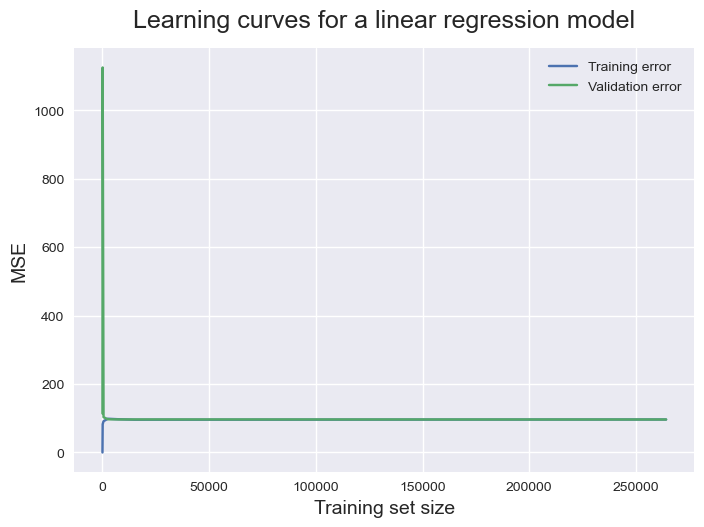

In [102]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()


(0.0, 150.0)

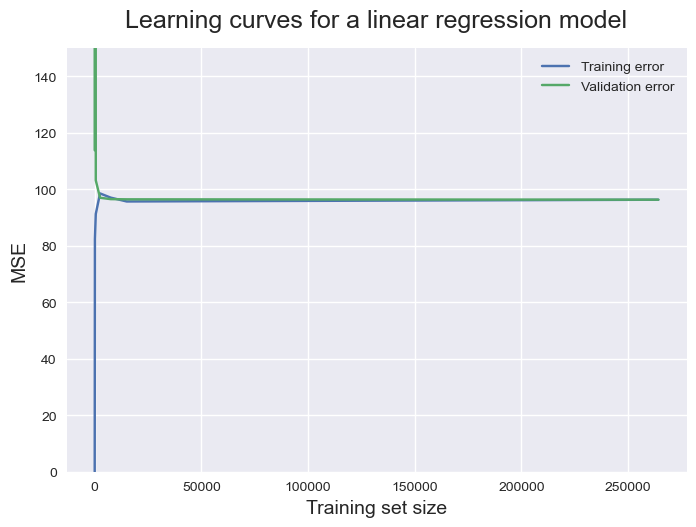

In [103]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,150)

In [65]:
top7_x_train = x_train[top_list[:7]]
top7_x_test = x_test[top_list[:7]]
top7_x_train

,Store,MDSum,MDAverage,MDMax,MarkDown1,MDMin,MarkDown5
0,1.392183,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181
1,-1.188910,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181
2,-1.188910,-0.245190,-0.049038,0.081929,-0.252011,-0.252011,0.081929
3,0.140744,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181
4,0.062529,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181
...,...,...,...,...,...,...,...
330172,0.375389,12.476386,2.495277,6.259835,6.068185,-0.134782,0.356177
330173,1.392183,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181
330174,-0.641405,4.212100,0.842420,3.053010,3.053010,-0.173069,0.261853
330175,-0.484975,-1.358972,-0.271794,-0.084662,-0.427943,-0.427943,-0.395181


In [66]:
reg7 = LinearRegression().fit(top7_x_train,y_train)

In [67]:
reg7.score(top7_x_train, y_train)

0.014089843219254106

In [68]:
reg7.score(top7_x_test, y_test)

0.015316189841475314

In [69]:
y_pred = reg7.predict(top7_x_test)

In [70]:
print("Coefficients: \n", reg.coef_)
print('Intercept: \n', reg.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[-9.66444459e-01  2.82617681e-01 -1.44076334e+00  2.29551754e-02
   1.18602404e-01  5.49926325e-01 -5.22629247e+11 -5.22629247e+11
  -5.22629247e+11 -5.22629247e+11 -5.22629247e+11 -4.73475644e-01
  -3.28597049e-01  4.85289633e+10  5.12923454e+11  4.89137121e+00
  -2.73696342e-01]]
Intercept: 
 [21.69163521]
Mean squared error: 97.20
Coefficient of determination: 0.02


Predict for submission

In [49]:
#provided submission test dataset
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Datasets/test.csv'
test = pd.read_csv(url)

#test dataset after preprocessing
url = 'https://media.githubusercontent.com/media/EricYangg/4AI3-Walmart-Forecast/main/Processed%20Dataset/Submission%20Test.csv'
submission_test = pd.read_csv(url)

In [50]:
Id = test['Store'].astype('string') + '_' + test['Dept'].astype('string') + '_' + test['Date'].astype('string')
Id

0           1_1_2012-11-02
1           1_1_2012-11-09
2           1_1_2012-11-16
3           1_1_2012-11-23
4           1_1_2012-11-30
                ...       
115059    45_98_2013-06-28
115060    45_98_2013-07-05
115061    45_98_2013-07-12
115062    45_98_2013-07-19
115063    45_98_2013-07-26
Length: 115064, dtype: string

In [51]:
submission_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,MDAverage,MDSum,MDMin,MDMax
0,-1.657956,-1.413724,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,0.019840,0.099201,-0.162850,0.316895
1,-1.657956,-1.381105,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,0.019840,0.099201,-0.162850,0.316895
2,-1.657956,-1.348485,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,0.019840,0.099201,-0.162850,0.316895
3,-1.657956,-1.315865,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,0.019840,0.099201,-0.162850,0.316895
4,-1.657956,-1.283245,-1.683055,-0.290032,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,0.019840,0.099201,-0.162850,0.316895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.776894,1.587292,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,-0.329306,-1.646529,-0.698176,-0.105842
115060,1.776894,1.619912,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,-0.329306,-1.646529,-0.698176,-0.105842
115061,1.776894,1.652532,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,-0.329306,-1.646529,-0.698176,-0.105842
115062,1.776894,1.717771,1.692932,-0.290032,1.181271,0.929055,-0.698176,-0.264229,-0.166549,-0.411733,-0.105842,-1.315901,-1.317896,-0.329306,-1.646529,-0.698176,-0.105842


In [52]:
y_pred = reg.predict(submission_test)
y_pred

array([[23.14732227],
       [23.1565691 ],
       [23.16578541],
       ...,
       [15.6950942 ],
       [15.71364889],
       [15.72280416]])

In [56]:
weekly_sales = y_pred[:,0]**3
weekly_sales

array([12402.30120818, 12417.17045409, 12432.00244767, ...,
        3866.26644126,  3879.9947195 ,  3886.7804979 ])

In [57]:
weekly_sales[0]

12402.301208179158

In [58]:
sub = {'Id':Id, 'Weekly_Sales':weekly_sales}
linReg_submission = pd.DataFrame(data=sub)

linReg_submission['Weekly_Sales'] = round(linReg_submission['Weekly_Sales'], 2)

linReg_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,12402.30
1,1_1_2012-11-09,12417.17
2,1_1_2012-11-16,12432.00
3,1_1_2012-11-23,12446.85
4,1_1_2012-11-30,12461.70
...,...,...
115059,45_98_2013-06-28,3852.75
115060,45_98_2013-07-05,3859.50
115061,45_98_2013-07-12,3866.27
115062,45_98_2013-07-19,3879.99


In [59]:
linReg_submission['Weekly_Sales'][1]

12417.17

In [60]:
linReg_submission.to_csv('Submission Files/Linear Regression.csv', float_format='%.2f',index=False)

In [71]:
submission_test[top_list[:7]]

,Store,MDSum,MDAverage,MDMax,MarkDown1,MDMin,MarkDown5
0,-1.657956,0.099201,0.019840,0.316895,-0.085347,-0.162850,-0.060954
1,-1.657956,0.099201,0.019840,0.316895,-0.085347,-0.162850,-0.060954
2,-1.657956,0.099201,0.019840,0.316895,-0.085347,-0.162850,-0.060954
3,-1.657956,0.099201,0.019840,0.316895,-0.085347,-0.162850,-0.060954
4,-1.657956,0.099201,0.019840,0.316895,-0.085347,-0.162850,-0.060954
...,...,...,...,...,...,...,...
115059,1.776894,-1.646529,-0.329306,-0.105842,-0.698176,-0.698176,-0.105842
115060,1.776894,-1.646529,-0.329306,-0.105842,-0.698176,-0.698176,-0.105842
115061,1.776894,-1.646529,-0.329306,-0.105842,-0.698176,-0.698176,-0.105842
115062,1.776894,-1.646529,-0.329306,-0.105842,-0.698176,-0.698176,-0.105842


In [73]:
y_pred = reg7.predict(submission_test[top_list[:7]])
y_pred

array([[21.35541132],
       [21.35541132],
       [21.35541132],
       ...,
       [18.00564563],
       [18.00564563],
       [18.00564563]])

In [74]:
weekly_sales = y_pred[:,0]**3
weekly_sales

array([9739.2120607 , 9739.2120607 , 9739.2120607 , ..., 5837.48927421,
       5837.48927421, 5837.48927421])

In [75]:
weekly_sales[0]

9739.212060696273

In [77]:
sub = {'Id':Id, 'Weekly_Sales':weekly_sales}
linReg_submission2 = pd.DataFrame(data=sub)

linReg_submission2['Weekly_Sales'] = round(linReg_submission['Weekly_Sales'], 2)

linReg_submission2

,Id,Weekly_Sales
0,1_1_2012-11-02,9739.21
1,1_1_2012-11-09,9739.21
2,1_1_2012-11-16,9739.21
3,1_1_2012-11-23,9739.21
4,1_1_2012-11-30,9739.21
...,...,...
115059,45_98_2013-06-28,5837.49
115060,45_98_2013-07-05,5837.49
115061,45_98_2013-07-12,5837.49
115062,45_98_2013-07-19,5837.49


In [79]:
linReg_submission2['Weekly_Sales'].value_counts()

8739.48    142
8289.19    135
6316.02     99
9149.88     74
9533.64     74
          ... 
6468.85     42
6473.21     42
6713.07     42
6491.33     41
6424.90     41
Name: Weekly_Sales, Length: 1752, dtype: int64

In [80]:
linReg_submission2.to_csv('Submission Files/Linear Regression 2.csv', float_format='%.2f',index=False)